# (연습) 연속 확률 분포

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

## 연속 균등 분포

`np.random.uniform()` 함수를 한 번 적용해서 생성된 실수들의 분포는 균등하지 않아 보인다.
하지만 현실에서의 균등 분포를 적절하게 반영한다.
예를 들어 동전을 10번 던졌을 때 반드시 5번씩 앞면, 뒷면이 나오지 않으며
주사위를 6번 던져도 반드시 1번씩 각각의 번호가 나오지는 않는다.

In [8]:
np.random.seed(17)
uni1000 = np.random.uniform(2, 5,1000)

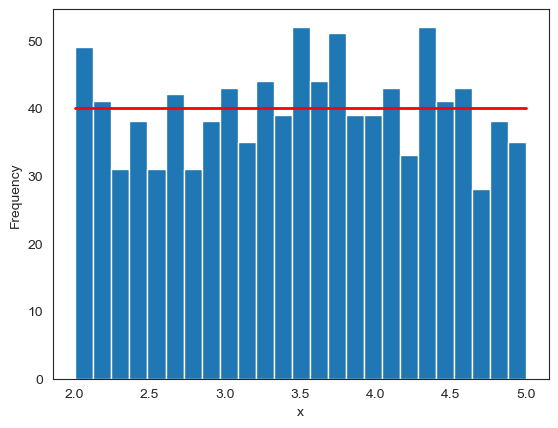

In [9]:
fig, ax = plt.subplots()

freqs, bins, _ = ax.hist(uni1000, bins=25)

# 평균 도수: freqs.mean() = 40.0
ax.plot(bins, np.ones_like(bins) * freqs.mean(), linewidth=2, color='r')

ax.set_xlabel('x')
ax.set_ylabel('Frequency')

plt.show()

하지만 동전 던지기 횟수를 1만번, 10만번 등 키우면 거의 50대 50의 확률로 앞면, 뒷면이 나오고,
주사위 던지기 횟수를 6만번, 60만번 으로 늘리면 거의 1/6의 확률로 각각의 숫자가 나온다.
이처럼 시행횟수를 늘렸을 때 이론적인 확률값에 수렴하는 현상을 
**큰 수의 법칙**<font size='2'>law of large numbers</font>이라 부른다.

**문제 1**

`np.random.uniform()` 함수를 1만번 실행했을 때 균등하게 등분된 구간별 상대도수의 평균값이 일정함을 보이는 모의실험 코드를 구현하라.
또한 구간별 상대도수의 평균값을 이용하여 아래와 같은 히스토그램을 그리는 코드를 작성하라.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/uniform_random01.png" style="width:570px"></div></p>

힌트:

1. `seed`값을 0부터 9,999까지 변경하면서 아래 내용을 1만 번 반복 실행한다.
    
  - 구간 $[2, 5]$에서 1,000개의 부동소수점을 균등 분포를 이용하여 선택한다.
  - 25개로 등분된 구간별 상대도수 분포를 계산한다.
  - 구간별 상대도수의 누적합을 계산한다.

2. 최종적으로 구간별 상대도수의 평균값을 계산한다.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


## 붓꽃 데이터셋

[2차원 데이터 시각화](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-twoD_visualization.ipynb)에서 다뤘던 붓꽃 데이터셋을 활용하여
확률 밀도 함수와 누적 분포 함수의 관계를 살펴 본다.

먼저 붓꽃 데이터셋을 기본 저장소에서 불러온다.

In [12]:
iris = pd.read_csv(data_url+"iris.csv")

총 150개의 샘플이 각각 다섯 개의 특성을 갖는다.

| 특성 | 의미 |
| :--- | :--- |
| sepal.length | 꽃받침 길이 |
| sepal.width | 꽃받침 너비 |
| petal.length | 꽃잎 길이 |
| petal.width | 꽃잎 길이 |
| variety | 품종 |

In [13]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


여기서는 꽃잎의 길이와 너비 정보만 활용한다.

In [14]:
iris = iris[['petal.length', 'petal.width']]

꽃잎 길이와 너비는 부동소수점으로 표현되며 꽃잎의 길이는 정해진 순서로 하나, 둘, 셋 등으로 셀 수
없기에 연속형 자료형이다.

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal.length  150 non-null    float64
 1   petal.width   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


**문제 2**

꽃잎 길이 정보만 따로 변수로 지정한다.

In [16]:
iris_length = iris['petal.length']

(1) 꽃잎 길이를 가리키는 연속 확률 변수 $X$가 특정 값 $a$ 이하의 값을 가질 확률을 계산하는
함수 `F_length()`를 선언하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) `F_length()` 함수가 누적 분포 함수의 성질을 만족함을 보여라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 3**

`F_length()` 함수를 이용하여 임의로 선택된 꽃잎 길이가 특정 구간에 속할 확률을 계산하는
`P_length()` 함수를 구현한 다음에
꽃잎 길이가 0.9에서 2.0 사이에 포함될 확률을 구하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 4**

아래 코드는 꽃잎 길이를 대상으로
가우스 커널을 사용하는 밀도 추정 기법(Gaussian KDE)을 활용하여 추정된 확률 밀도 함수의 그래프를 그린다.

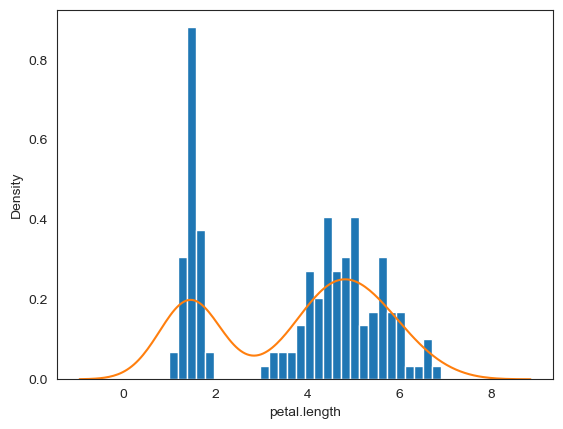

In [24]:
fig, ax = plt.subplots()

# 구간별 밀도 히스토그램
ax.hist(iris_length, bins=30, density=True)

# 추정된 확률 밀도 함수 그래프
sns.kdeplot(ax=ax, data=iris_length)

plt.show()

하지만 아래 그림의 확률 밀도 함수 그래프가 보다 적절해 보인다.
적절한 `bw_method` 키워드 인자를 지정하여 아래 그림의 그래프를 그리는 코드를 작성하라.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/iris_length_density01.png" style="width:570px"></div></p>

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 5**

`scipy.stats.gaussian_kde()` 함수를 이용하여 꽃잎 길이 데이터 분포에 대한 확률 밀도 함수의 그래프를 그려라.
단, 확률 밀도 함수의 그래프가 이전 그림에서처럼 그려져야 한다.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 6**

붓꽃 데이터셋에는 세 개의 품종이 각각 50개씩 포함되어 있으며,
세토사, 버시컬러, 버지니카 순으로 정렬되어 있다.

| 인덱스 | 품종 |
| :---: | :--- |
| 0 - 49 | 세토사(Iris setosa) |
| 50-99 | 버시컬러(Iris versicolor) |
| 100-149 | 버지니카(Iris verginica) |

아래 코드는
꽃잎의 길이와 너비 정보만 이용하여 150개 데이터 샘플의 산점도를 
품종별로 구분하여 그린다.

옅은 빨강으로 칠해진 영역은 꽃잎 길이가 4.5에서 5.1에 사이에 위치하는 영역을 표시한다.

- 4.5: 버지니카 품종 꽃잎 길이의 최솟값
- 5.1: 버시컬러 품종 꽃잎 길이의 최댓값

표시 영역에 버시컬러와 버지니카 두 품종이 섞여 있어서 
꽃잎 길이 만으로는 두 품종을 구분하기 어렵다.

In [28]:
versicolor_max = iris_length[50:100].max()
versinica_min = iris_length[100:150].min()

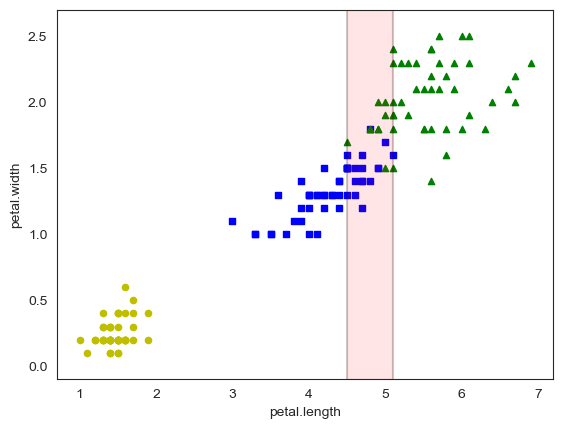

In [29]:
fig, ax = plt.subplots()

# 품종별 산점도 구분
styles = ("yo", "bs", "g^")
for i in range(3):
    iris[i*50: (i+1)*50].plot.scatter(ax=ax, 
                                      x='petal.length', 
                                      y='petal.width', 
                                      color=styles[i][0], 
                                      marker=styles[i][1])

# versinica_min와 versicolor_max 구분선    
ax.vlines(versinica_min, -0.1, 2.7, color='k', alpha=0.2)
ax.vlines(versicolor_max, -0.1, 2.7, color='k', alpha=0.2)

# 두 구분선 사이 색칠
xs = np.arange(versinica_min, versicolor_max, 0.01)
ys0 = [-0.1]*len(xs)
ys1 = [2.7]*len(xs)
ax.fill_between(xs, ys0, ys1, alpha=0.1, color='r')

# y-축 범위 지정
ax.set_ylim(-0.1, 2.7)

plt.show()

표시된 영역에 포함된 샘플의 비율을 계산하라.
단, `P_length()` 함수는 이용하지 않고 넘파이 어레이 부울 연산만 활용한다.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 7**

(1) $P(a \le X \le b)$를 추정하는 `P_estimate()` 함수를 `scipy.integrate.quad()` 함수를 이용하여 정의하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) 실수 전체 영역에서는 확률이 1임을 확인하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(3) 꽃잎 길이 전체 범위에서의 확률은 1보다 아주 조금 작음을 확인하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(4) 세토사 품종의 비율을 `P_estimate()` 함수를 이용하여 확인하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(5) 문제 6의 그래프에서 옅은 빨강으로 표시된 영역에 포함된 샘플의 비율을 
`P_estimate()`, `P_length()` 두 함수를 각각 이용하여 확인하고
두 함숫값의 차이가 발생하는 이유를 설명하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


## 데이터 분포 시각화

아래 네 개의 그래프 모두 붓꽃 데이터셋의 꽃잎 길이의 분포를 표현한다.

- 상단 두 개 그래프: `bins=30` 사용. 오른편 그래프는 `bw_method=0.12` 지정.
- 하단 두 개 그래프: `bins=13` 사용. 오른편 그래프는 `bw_method=0.2` 지정.

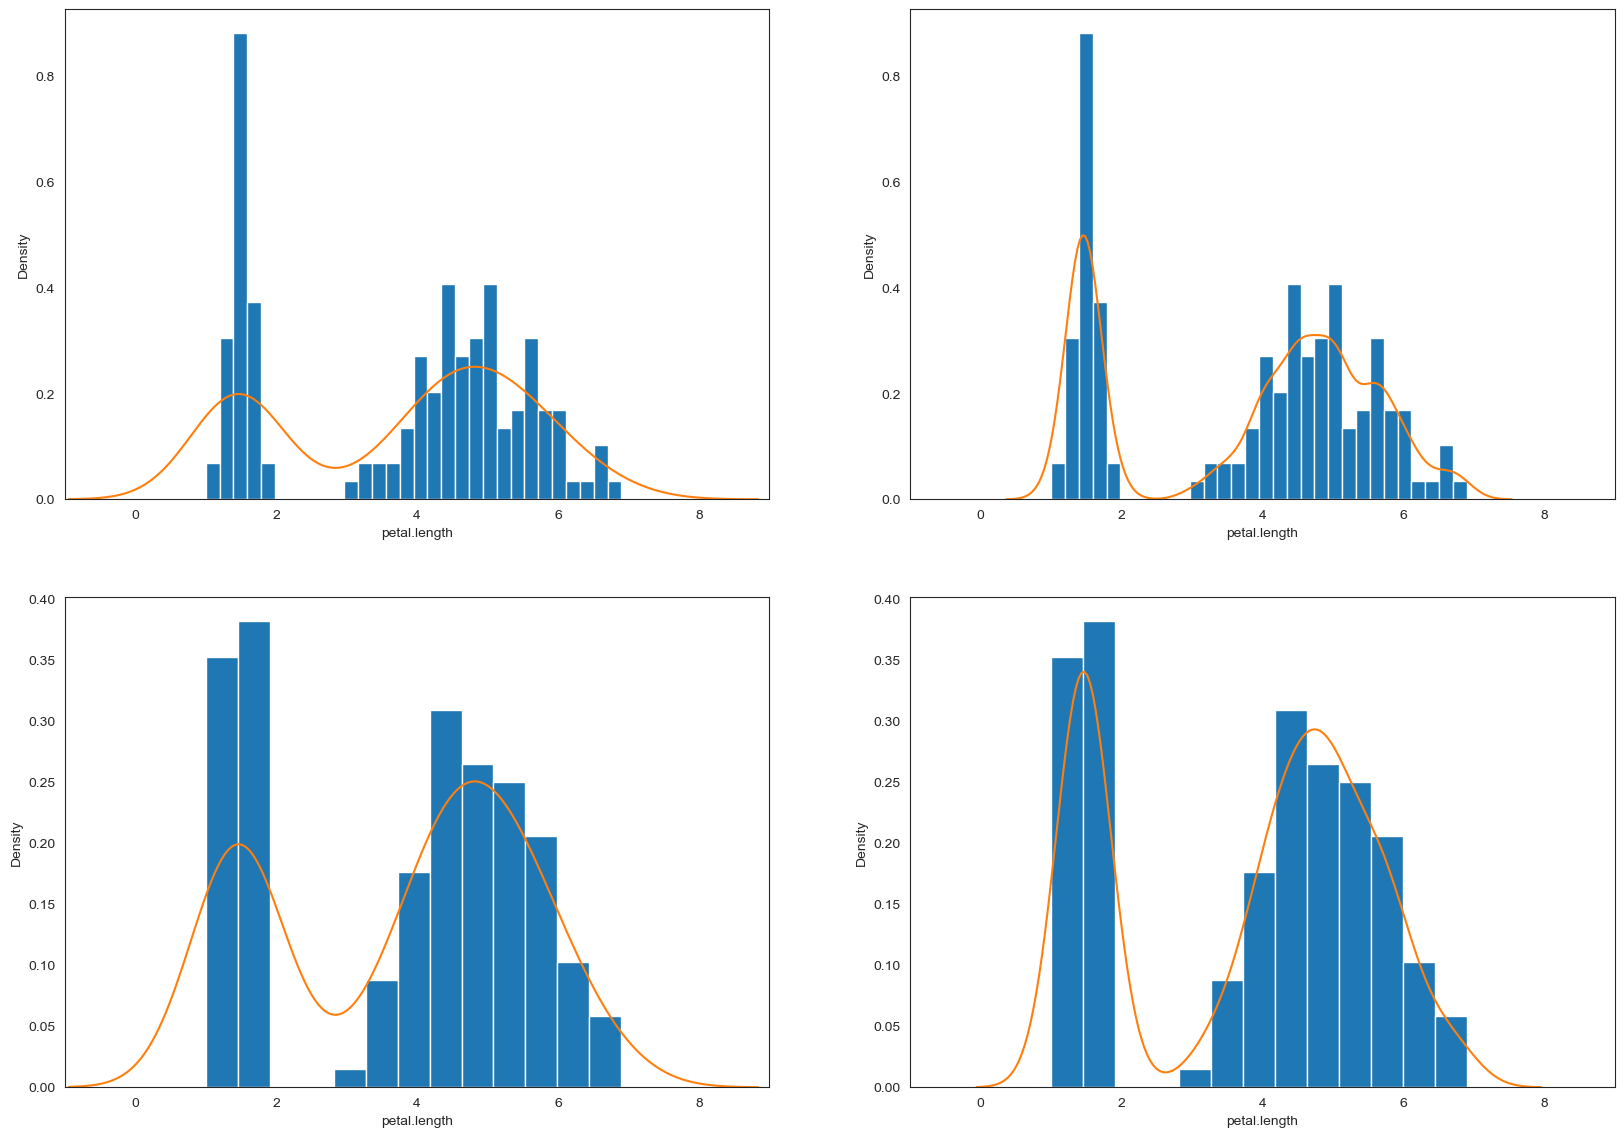

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

axes[0, 0].hist(iris_length, bins=30, density=True)
sns.kdeplot(ax=axes[0, 0], data=iris_length)
axes[0, 0].set_xlim(-1, 9)

axes[0, 1].hist(iris_length, bins=30, density=True)
sns.kdeplot(ax=axes[0, 1], data=iris_length, bw_method=0.12)
axes[0, 1].set_xlim(-1, 9)

axes[1, 0].hist(iris_length, bins=13, density=True)
sns.kdeplot(ax=axes[1, 0], data=iris_length)
axes[1, 0].set_xlim(-1, 9)

axes[1, 1].hist(iris_length, bins=13, density=True)
sns.kdeplot(ax=axes[1, 1], data=iris_length, bw_method=0.2)
axes[1, 1].set_xlim(-1, 9)

plt.show()

이처럼 히스토그램과 추정 확률 밀도 함수는 막대의 개수와 bandwidth 인자값에 의존한다.
네 개 중에 붓꽃 데이터셋의 꽃잎 길이의 분포를 가장 잘 대변하는 그래프를 선정하는 기준이 있으면 좋겠지만 그렇지 않다.

이전 설명에서는 상단 오른편 그래프를 선택하였다.
이유는 세 개의 품종을 나름 잘 구분하면서 확률 밀도 함수 그래프가 그려지기 때문이다.
그런데 상단 오른편의 확률 밀도 함수는 구간별 확률을 실제 확률과 많이 다르게 계산한다.
앞서 보았듯이 버시컬러와 버지니카 품종이 꽃잎 길이 기준으로 구분할 수 없는 영역에
포함된 샘들의 비율에 대한 오차가 6퍼센트 이상 차이난다.

In [38]:
P_estimate(4.499999, 5.1) - P_length(4.499999, 5.1)

-0.064107

하단 두 개의 그래프는 버시컬러와 버지니카 두 품종을 구분하지 않는다.
하지만 KDE 기법으로 추정된 확률 밀도 함수가 보다 정확해 보인다.
과연 실제로 보다 정확한 구간 확률을 계산하는지 확인해본다.

**문제 8**

(1) 하단 오른편에 그려진 추정 확률 밀도 함수를 가리키는 `f_length13()` 함수를 선언하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) `f_length13()` 함수를 이용하여 누적 분포 함수 `P_estimate13()`를 선언하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(3) 버시컬러와 버지니카 두 품종이 겹치는 영역에 속할 확률을 
`P_estimate13()` 함수를 이용한 다음에 `P_length()` 함수와의 오차를 계산하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(4) `P_estimate()` 함수를 이용할 때의 오차보다 큰 오차를 보인다. 그 이유를 추정하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 9**

KDE 기법은 **단봉 분포**<font size='2'>unimodal distribution</font>, 
즉 하나의 봉우리만 갖는 형태의 데이터 분포를 갖는 확률 변수에 대해서만 제대로 작동한다.
이전 문제에서 확인하였듯이 붓꽃 데이터셋의 꽃잎 길이는 사실 3 개의 봉우리를 
갖는 **다봉 분포**<font size='2'>multimodal distribution</font>를 갖는다.

그런데 품종을 구분하지 않은면서 산점도를 그리면
버시컬러와 버지니카 품종은 꽃잎 길이를 기준으로 구분할 수 없다.

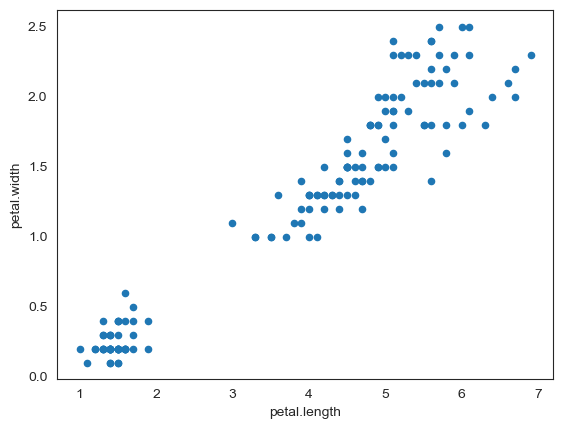

In [43]:
fig, ax = plt.subplots()

iris.plot.scatter(ax=ax, x='petal.length', y='petal.width')
plt.show()

이 아이디어에 착안해서 버시컬러와 버지니카 품종 100개만 별도로 분석해 본다.

In [44]:
versi_vergi = iris_length[50:]

아래 코드는 버시컬러와 버지니카 품종 100개에 대해 KDE 기법을
기본값으로 지정한 채 적용하여 얻은 확률 밀도 함수의 그래프를 그린다.

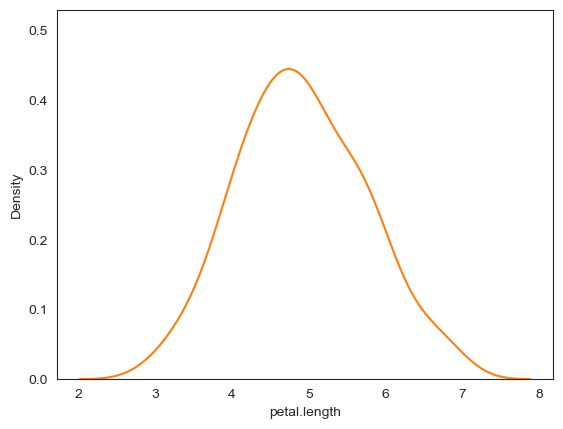

In [45]:
fig, ax = plt.subplots()

# 추정된 확률 밀도 함수 그래프
sns.kdeplot(ax=ax, data=versi_vergi,color='#ff7f0e')

ax.set_ylim(0.0, 0.53)

plt.show()

위 확률 밀도 함수를 이용하여 구간별 확률을 계산하면 이전 보다 정확한 값을 계산한다.
예를 들어 버시컬러와 버지니카 품종이 섞여 있는 구간에 속할 확률이 실제 확률과의
오차가 1.4% 정도로 줄어들었다.
무엇보다도 이전과는 다르게 추정 확률이 실제 확률 보다 크다.

In [46]:
import scipy.stats
from scipy.integrate import quad

f_lengthVV = scipy.stats.gaussian_kde(versi_vergi)

def P_estimateVV(a, b):
    p, _ = quad(f_lengthVV, a, b)
    return p

In [47]:
P_estimateVV(4.499999, 5.1) - P_length(4.499999, 5.1)

0.013765

결론적으로 KDE 기법은 단봉 분포를 갖는 데이터의 분포에 보다 잘 작동한다.

질문: 

KDE 기법으로 버시컬러와 버지니카 품종 100개에 대해 KDE 기법으로 찾아진
확률 밀도 함수의 그래프에 가장 적합한 히스토그램을 그리는 데에 필요한 구간의 개수,
즉 `plt.hist()` 함수의 `bins` 키워드 인자의 값을 실험을 통해 확인하라.

In [1]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
